# Exploratory Data Analysis (EDA) Bank dataset

### Importar Librerias

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv

Matplotlib is building the font cache; this may take a moment.
/Users/stefanie/Desktop/BA_Machine Learning/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Cargar el dataset 

In [18]:
datos = pd.read_csv('bank_dataset.csv')

### Informació general del dataset

In [19]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11152 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11157 non-null  object 
 3   education  11155 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


### Mostrar las primeras filas de DS

In [20]:
datos.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### Descripció estadística del dataset

In [21]:
datos.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11152.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.235384,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.914934,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### Histograma de cada variable numerica

Feature: age                                 |▌         | [  6%]   07:02 -> (1:59:41 left)


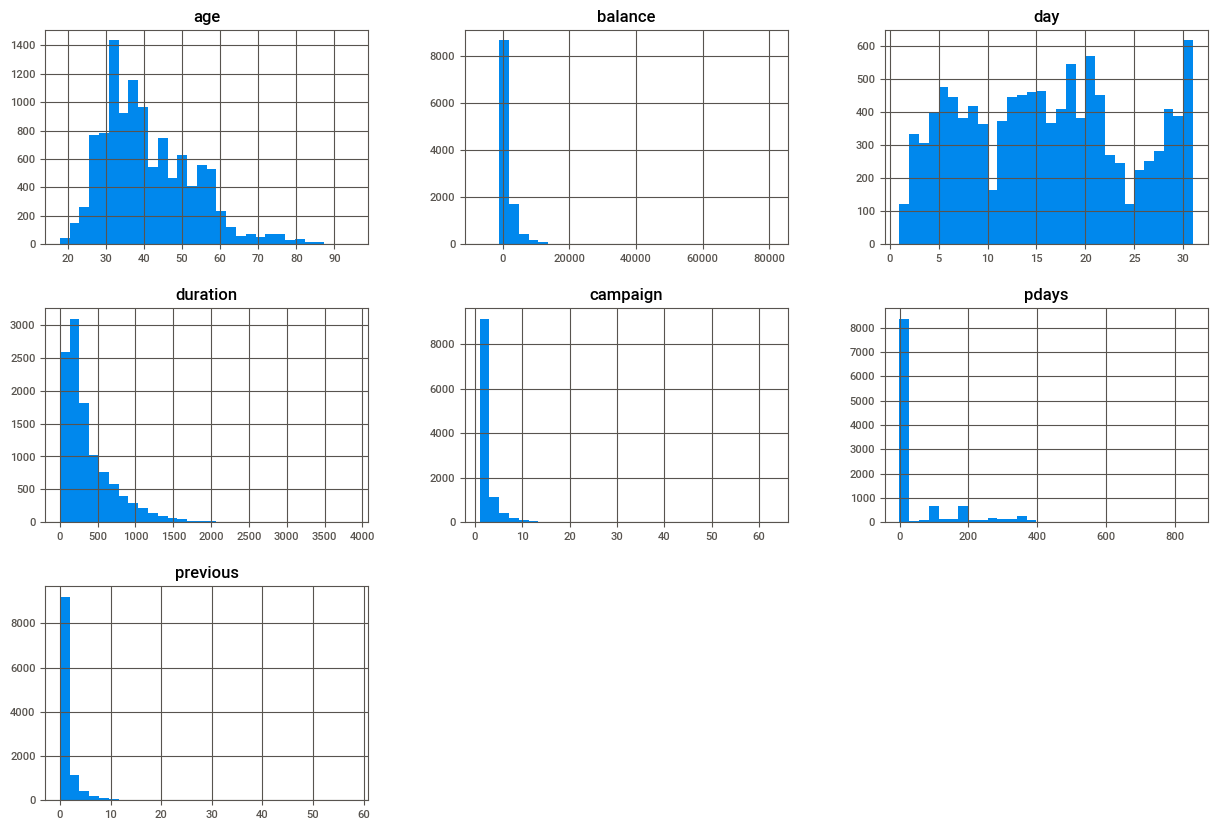

In [22]:
datos.hist(bins=30, figsize=(15, 10))
plt.show()

### Contar los valores de cada variable categórica
revisando los valores que contienen las variables categoricas para poder entender y tener una idea de los datos categoricos que se tienen y sus tipos.

In [24]:
for column in datos.select_dtypes(include=['object']).columns:
    print(datos[column].value_counts())

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64
marital
married     6349
single      3517
divorced    1291
Name: count, dtype: int64
education
secondary    5474
tertiary     3685
primary      1500
unknown       496
Name: count, dtype: int64
default
no     10994
yes      168
Name: count, dtype: int64
housing
no     5881
yes    5281
Name: count, dtype: int64
loan
no     9702
yes    1460
Name: count, dtype: int64
contact
cellular     8042
unknown      2346
telephone     774
Name: count, dtype: int64
month
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: count, dtype: int64
poutcome
unknown    8326
failure    1228
success    1071
other       537
Nam

### Contar los valores nulos por columna
Encontrando los valores nulos o faltantes en cada una de las columnas del dataset

In [25]:
datos.isnull().sum()

age          10
job           0
marital       5
education     7
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

### Visualitzación de valores nulos

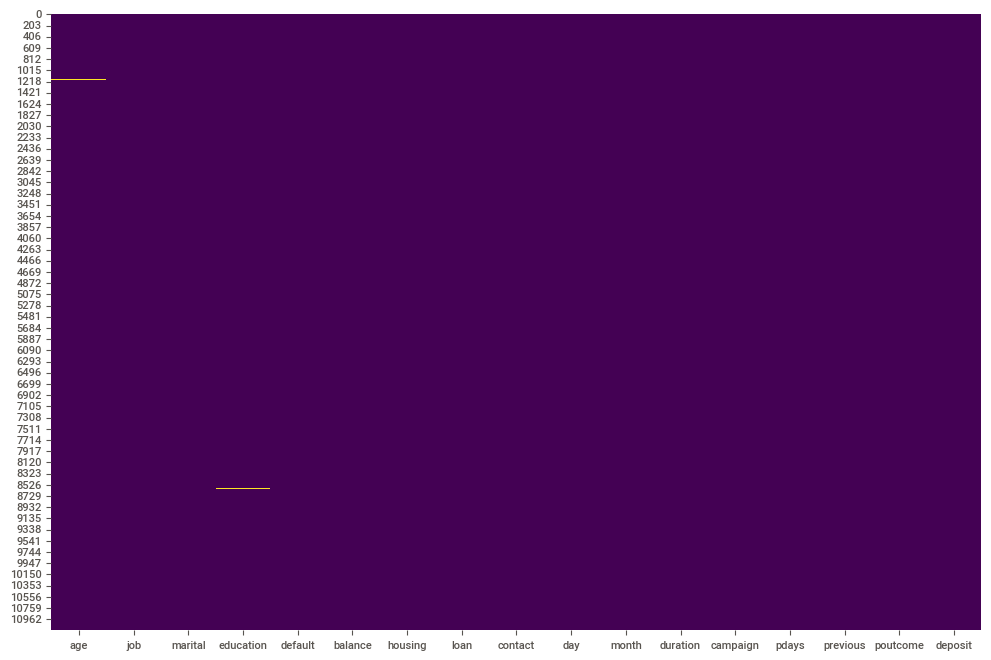

In [26]:
plt.figure(figsize=(12, 8))
sns.heatmap(datos.isnull(), cbar=False, cmap='viridis')
plt.show()

### Manejo de datos Faltantes
He encontrado que el dataset cuenta con algunos datos faltantes en las columnas de edad, educación y estado civil, para ello utilizare un dropna que eliminara las filas con los valores faltantes para asi tener un dataset limpio.  

In [33]:
datos_na = datos.dropna()
#print(datos_na)

datos_na.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

### Calcular la matriz de correlación y visualizar con un mapa de calor

In [35]:
correlation = datos.corr(numeric_only=True)

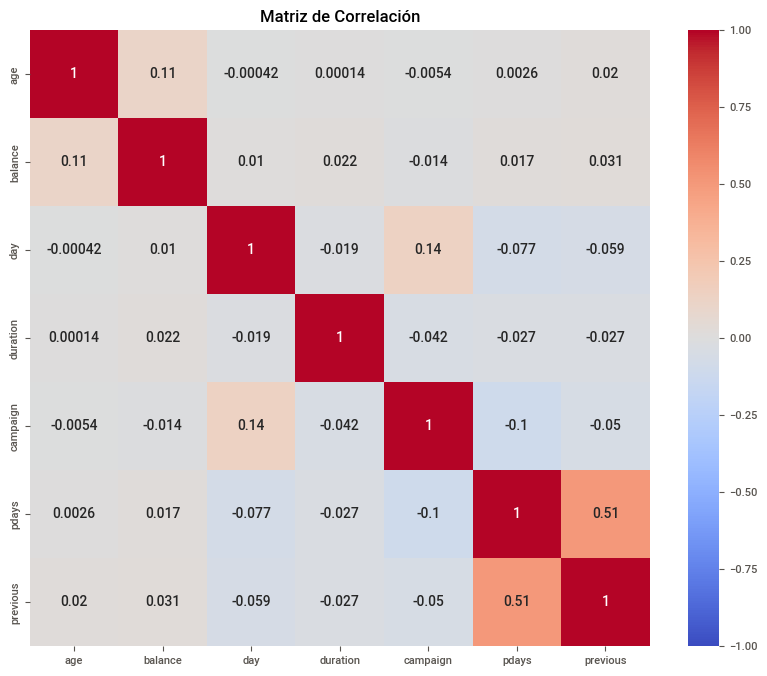

In [36]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Matriz de Correlación')
plt.show()

## Conclusiones

El dataset cuenta con un total de 11162 filas y 17 columnas, se exploro el contenido mediante un analisis estadistico. 

Se evidencio unos valores faltantes en algunas columnas (edad, educación y estado civil) y se hizo la eliminacion de los valores de las filas que tenian valores faltantes debido a que teniendo una gran cantidad de datos eliminar 10 de ellos no supondria una gran perdida. 

La matriz de correlacion entre las variables (numericas) muestra una correlacion positiva perfecta entre los dias de contacto y si se ha contactado previamente, igualmente existe esta correlacion en menor medida entre la edad y el balance de la cuenta como entre la campaña y el dia que se contacto a la persona. Tambien exiten correlacciones negativas perfectas. 

Los histogramas tambuen arrojaron informacion interesante como la distribucion de las edades de los usuarios del banco donde la mayoria se ubica entre los 25 a 58 años de edad. Mientras que el histograma de los dias del mes que se hcieron llamadas muestra un mayor numero a partir del 15 y hasta el final de cada mes. 

En general el EDA permitio conocer mas a fondo el dataset y tener una idea global de las variables que contiene y como se encuentran distribuidos los datos, esto ayuda a saber con que se cuenta para alimentar el algoritmo que se desea utilizar en el proyecto.  